p(5|ω1) = 1.4867195147342977e-06
p(5|ω2) = 0.06475879783294587


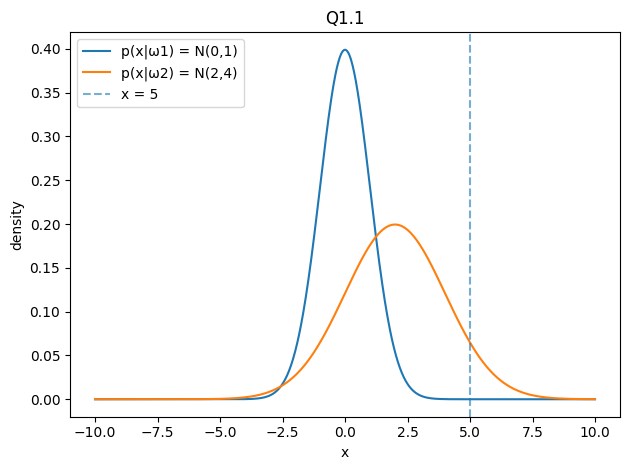

In [24]:
# Q1.1
import numpy as np
import matplotlib.pyplot as plt

def p1(x):
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5*(x**2))

def p2(x):
    return (1/(np.sqrt(2*np.pi)*2)) * np.exp(-0.5*((x-2)/2)**2)

x0 = 5.0
print("p(5|ω1) =", p1(x0)) 
print("p(5|ω2) =", p2(x0))  

xs = np.linspace(-10, 10, 1000)
plt.plot(xs, p1(xs), label='p(x|ω1) = N(0,1)')
plt.plot(xs, p2(xs), label='p(x|ω2) = N(2,4)')
plt.axvline(x0, ls='--', alpha=0.6, label='x = 5')
plt.title('Q1.1')
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.show()



p(5) = 0.02590441116488719


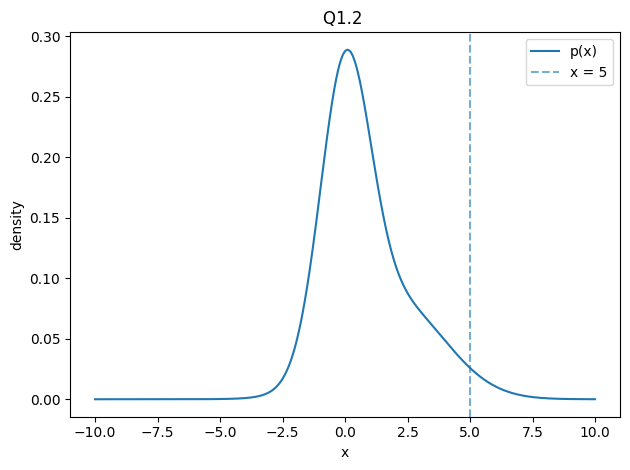

In [27]:
# Q1.2 
import numpy as np
import matplotlib.pyplot as plt

P1, P2 = 0.6, 0.4

def p1(x):  
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5*(x**2))

def p2(x): 
    return (1/(np.sqrt(2*np.pi)*2)) * np.exp(-0.5*((x-2)/2)**2)

x0 = 5.0
def px(x):
    return P1*p1(x) + P2*p2(x)

print("p(5) =", px(x0))  

xs = np.linspace(-10, 10, 1000)
plt.plot(xs, px(xs), label='p(x)')
plt.axvline(x0, ls='--', alpha=0.6, label='x = 5')
plt.title('Q1.2 ')
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.show()


P(ω1|5) = 3.443551382668394e-05
P(ω2|5) = 0.9999655644861734
Check sum = 1.0


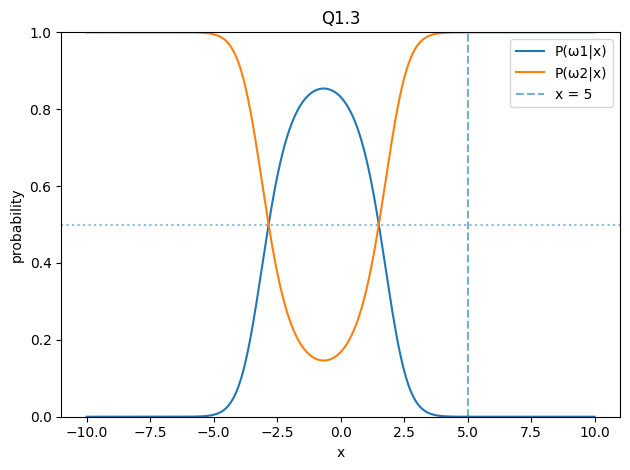

In [ ]:
# Q1.3
import numpy as np
import matplotlib.pyplot as plt

P1, P2 = 0.6, 0.4

def p1(x): 
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5*(x**2))

def p2(x):  
    return (1/(np.sqrt(2*np.pi)*2)) * np.exp(-0.5*((x-2)/2)**2)

def px(x):
    return P1*p1(x) + P2*p2(x)

def post1(x):
    return (P1*p1(x)) / px(x)

def post2(x):
    return (P2*p2(x)) / px(x)

x0 = 5.0
print("P(ω1|5) =", post1(x0)) 
print("P(ω2|5) =", post2(x0))  
print("Check sum =", post1(x0)+post2(x0))

xs = np.linspace(-10, 10, 1000)
plt.plot(xs, post1(xs), label='P(ω1|x)')
plt.plot(xs, post2(xs), label='P(ω2|x)')
plt.axhline(0.5, ls=':', alpha=0.5)
plt.axvline(x0, ls='--', alpha=0.6, label='x = 5')
plt.title('Q1.3')
plt.xlabel('x') 
plt.ylabel('probability')
plt.ylim(0,1)
plt.legend()
plt.tight_layout()
plt.show()


L(5) = 2.2957799781421097e-05


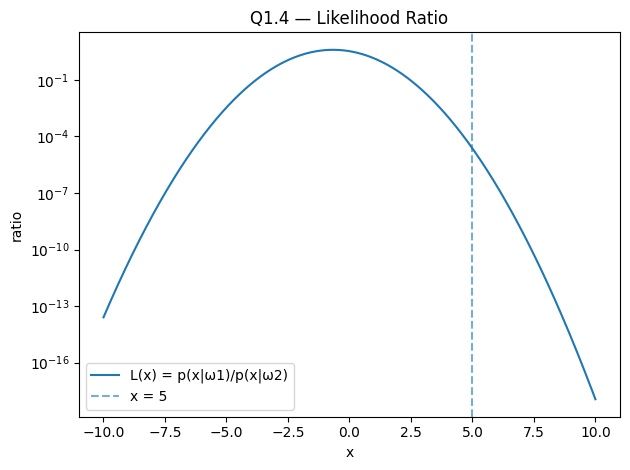

In [26]:
# Q1.4 
import numpy as np
import matplotlib.pyplot as plt

def p1(x): 
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5*(x**2))

def p2(x): 
    return (1/(np.sqrt(2*np.pi)*2)) * np.exp(-0.5*((x-2)/2)**2)

def L(x):
    return p1(x) / p2(x)

x0 = 5.0
print("L(5) =", L(x0))  

xs = np.linspace(-10, 10, 1000)
plt.plot(xs, L(xs), label='L(x) = p(x|ω1)/p(x|ω2)')
plt.axvline(x0, ls='--', alpha=0.6, label='x = 5')
plt.yscale('log')
plt.title('Q1.4 — Likelihood Ratio')
plt.xlabel('x'); plt.ylabel('ratio'); plt.legend()
plt.tight_layout(); plt.show()


n loss = 0.6666666666666667
Decision boundary points: [-2.83631019  1.50296752]


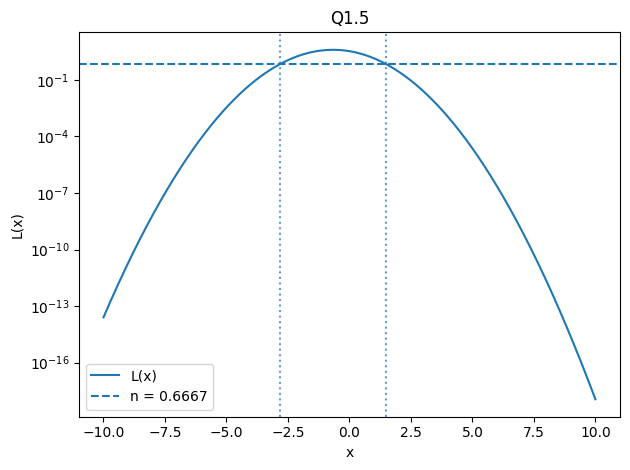

In [30]:
# Q1.5 
import numpy as np
import matplotlib.pyplot as plt

P1, P2 = 0.6, 0.4
eta = P2 / P1  

def p1(x):
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5*(x**2))

def p2(x):
    return (1/(np.sqrt(2*np.pi)*2)) * np.exp(-0.5*((x-2)/2)**2)

def L(x):
    return p1(x) / p2(x)

def crossings(x, y):
    s = np.sign(y)
    idx = np.where(np.diff(s)!=0)[0]
    roots = []
    for i in idx:
        x0, x1 = x[i], x[i+1]
        y0, y1 = y[i], y[i+1]
        roots.append(x0 - y0*(x1-x0)/(y1-y0))
    return np.array(roots)

xs = np.linspace(-10, 10, 1000)  
vals = np.log(L(xs)) - np.log(eta)
roots = crossings(xs, vals)

print("n loss =", eta)
print("Decision boundary points:", roots)  


plt.plot(xs, L(xs), label='L(x)')
plt.axhline(eta, ls='--', label=f'n = {eta:.4f}')
for r in roots: 
    plt.axvline(r, ls=':', alpha=0.7)
plt.yscale('log')
plt.title('Q1.5')
plt.xlabel('x')
plt.ylabel('L(x)')
plt.legend()
plt.tight_layout()
plt.show()


R(a1|5) = 3.9998622579446934
R(a2|5) = 6.887102765336788e-05
Bayes action at x=5 = a2 (decide w2)


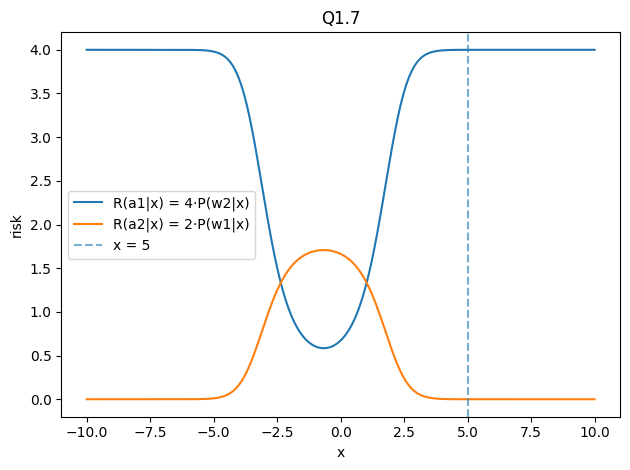

In [33]:
# Q1.7 
import numpy as np
import matplotlib.pyplot as plt

P1, P2 = 0.6, 0.4
lam11, lam12, lam21, lam22 = 0, 4, 2, 0

def p1(x): 
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5*(x**2))

def p2(x):  
    return (1/(np.sqrt(2*np.pi)*2)) * np.exp(-0.5*((x-2)/2)**2)

def px(x):
    return P1*p1(x) + P2*p2(x)

def post1(x):
    return (P1*p1(x)) / px(x)

def post2(x):
    return (P2*p2(x)) / px(x)

def R_alpha1(x):
    return 4*post2(x)

def R_alpha2(x):
    return 2*post1(x)

x0 = 5.0
print("R(a1|5) =", R_alpha1(x0))  
print("R(a2|5) =", R_alpha2(x0)) 
print("Bayes action at x=5 =", "a2 (decide w2)" if R_alpha2(x0) < R_alpha1(x0) else "a1 (decide w1)")

xs = np.linspace(-10, 10, 1000)
plt.plot(xs, R_alpha1(xs), label='R(a1|x) = 4·P(w2|x)')
plt.plot(xs, R_alpha2(xs), label='R(a2|x) = 2·P(w1|x)')
plt.axvline(x0, ls='--', alpha=0.6, label='x = 5')
plt.title('Q1.7')
plt.xlabel('x')
plt.ylabel('risk')
plt.legend()
plt.tight_layout()
plt.show()
